In [1]:
import numpy as np
import pandas as pd

import torch
from torch.utils.data import Dataset

import zarr
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload

In [18]:
%autoreload 2
from zarr_dataset import Zarr_Dataset

In [4]:
BUCKET_NAME = 'datasets-sdm2'
folder = 'geoLifeCLEF/features'
# s3://datasets-sdm2/geoLifeCLEF/features/
filename = 'train_ca.zarr'
s3_feature_path = 's3://{}/{}/{}'.format(BUCKET_NAME, folder, filename)
print(s3_feature_path)

s3://datasets-sdm2/geoLifeCLEF/features/train_ca.zarr


In [19]:
# test_dataset = Zarr_Dataset('../data/example.zarr')
train_dataset = Zarr_Dataset(s3_feature_path)

In [6]:
patch, target = train_dataset[320]

[Completed Extraction]: 320


In [7]:
patch.shape, patch.dtype, target.shape, target.dtype

(torch.Size([31, 64, 64]), torch.float32, torch.Size([5079]), torch.float32)

In [8]:
target.sum()

tensor(163.9451)

In [9]:
patch.min(), patch.max()

(tensor(0.), tensor(0.8320))

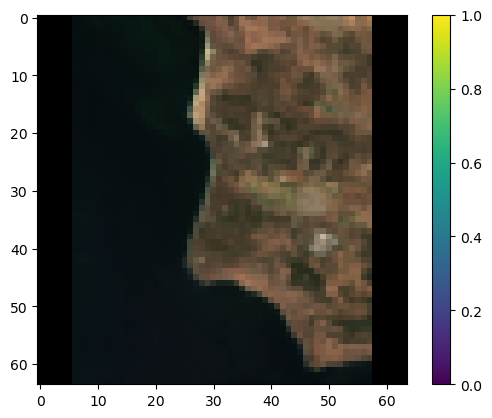

In [10]:
img = patch[0:3,:,:]
img = img.numpy()
img = img.transpose([1, 2, 0])
plt.imshow(img, vmax=1)
plt.colorbar()
plt.show()

(tensor(0.7319), tensor(0.))

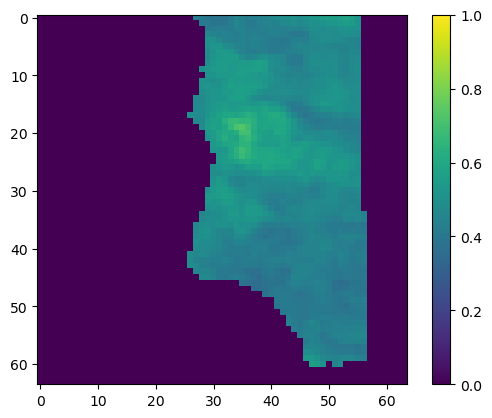

In [11]:
ped = patch[-1].unsqueeze(dim=0)#-> Remove first dim (channel) 
plt.imshow(ped.permute(1, 2, 0),vmax=1)#, vmax=1.0)
plt.colorbar()
patch[-1].max(), patch[-1].min()

In [12]:
x = zarr.open(s3_feature_path, mode='r')

In [13]:
x.info

Type,zarr.core.Array
Data type,object
Shape,"(17173, 2)"
Chunk shape,"(10, 2)"
Order,C
Read-only,True
Filter [0],Pickle(protocol=5)
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.FSStore
No. bytes,274768 (268.3K)
No. bytes stored,287364917 (274.1M)


In [20]:
len(train_dataset)

17173